# Proyecto: Clasificación de Diferentes Actividades mediante Análisis de EMG

## Objetivo

Desarrollar habilidades en el procesamiento y análisis de señales de electromiografía (EMG) para detectar y clasificar diferentes actividades físicas. Utilizarán una base de datos que contiene registros EMG obtenidos durante la realización de diversas actividades y aplicarán modelos autorregresivos (AR), de medias móviles (MA), autorregresivos de medias móviles (ARMA) y redes neuronales.

## Base de Datos

Una mujer y tres hombres (de entre 25 y 30 años) que han experimentado agresiones en circunstancias como peleas físicas participaron en el experimento. Cada sujeto tuvo que realizar 10 actividades normales y 10 actividades agresivas a través de 20 experimentos distintos. La arena robótica de Essex fue el principal salón experimental donde se llevó a cabo la recolección de datos.

El rendimiento de los sujetos fue registrado por el aparato EMG de Delsys (fs = 2kHz), que interconecta la actividad humana con las contracciones mioeléctricas. En este contexto, el procedimiento de registro de datos incluyó ocho electrodos de superficie cutánea ubicados en la parte superior de los brazos (bíceps y tríceps) y en la parte superior de las piernas (muslos e isquiotibiales). El número total de electrodos fue de ocho, lo que correspondió a ocho series temporales de entrada, una para cada canal muscular.

En este problema solo utilizaran los datos provistos en la carpeta adjunta.

## Requisitos

El clasificador desarrollado debe estar basado en modelos AR, MA o ARMA y redes neuronales, utilizando únicamente las señales de EMG para la extracción de características. Esto les permitirá aplicar los conocimientos teóricos adquiridos y adaptarlos a un contexto práctico.

## Resultados Esperados

Al finalizar la práctica, habrán adquirido una comprensión profunda del proceso de análisis de señales EMG y desarrollado competencias en el uso de herramientas de aprendizaje automático, específicamente modelos AR, MA, ARMA y redes neuronales, para la clasificación de datos biomédicos. Además, estarán mejor preparados para enfrentar desafíos en el campo de la ingeniería biomédica y contribuir al desarrollo de soluciones innovadoras para el monitoreo y análisis de actividades físicas.

## Metodología

1. **Preprocesamiento de Datos**: Cargar y limpiar los datos de EMG, eliminando ruido y artefactos.

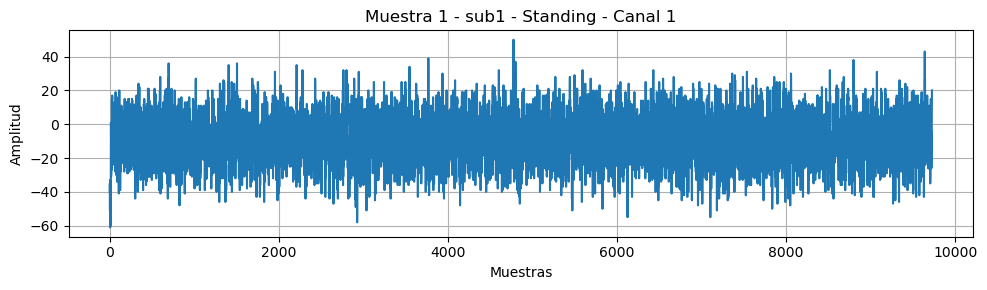

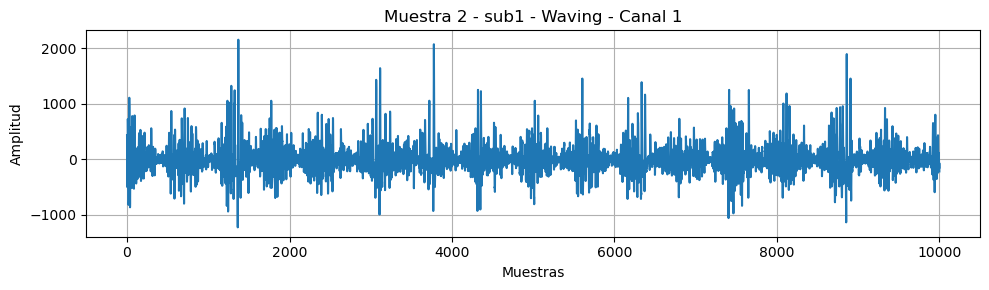

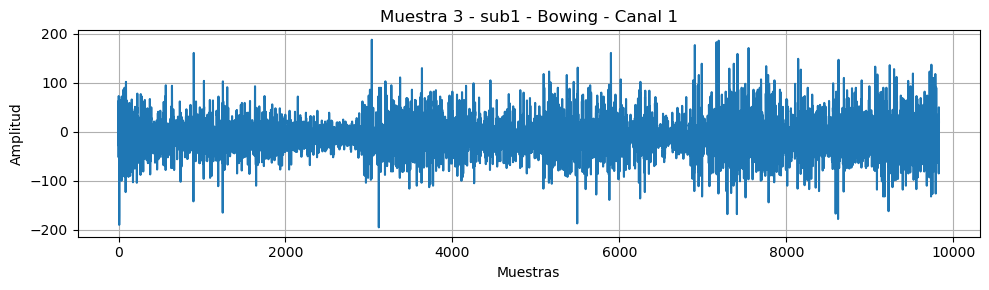

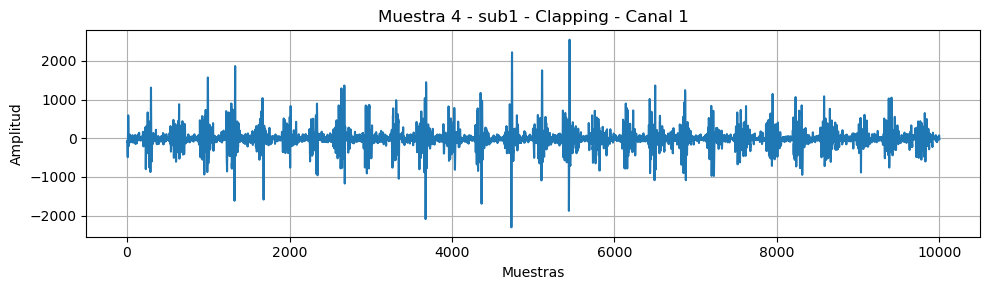

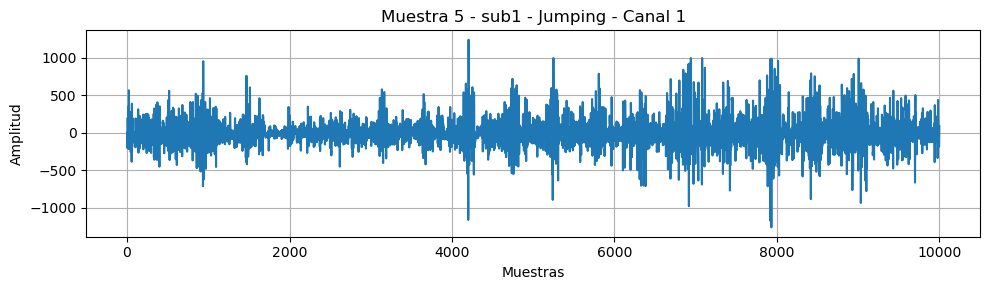

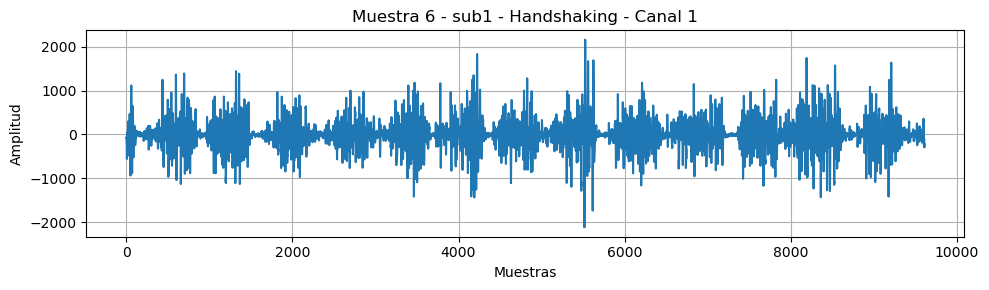

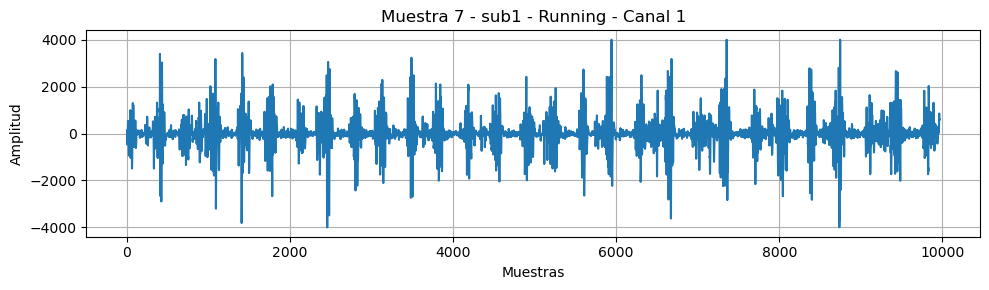

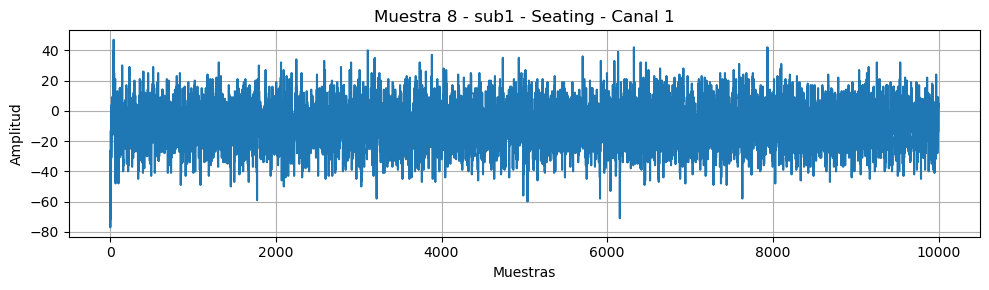

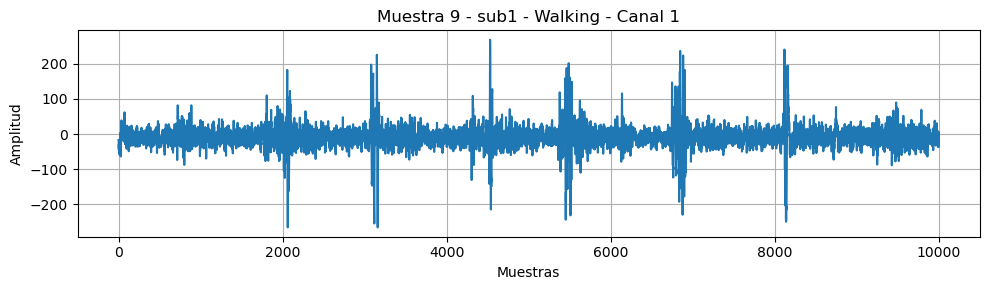

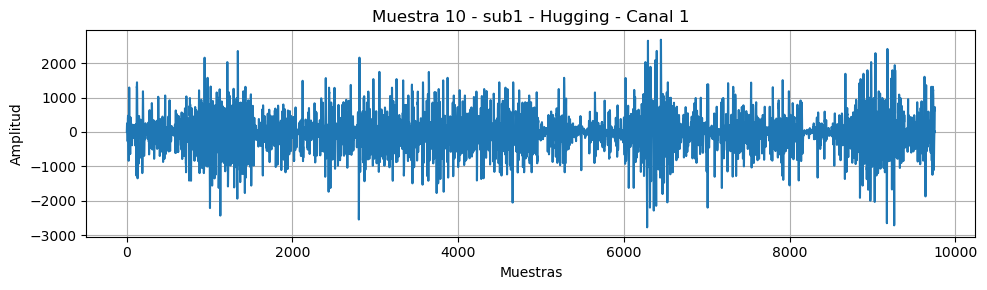

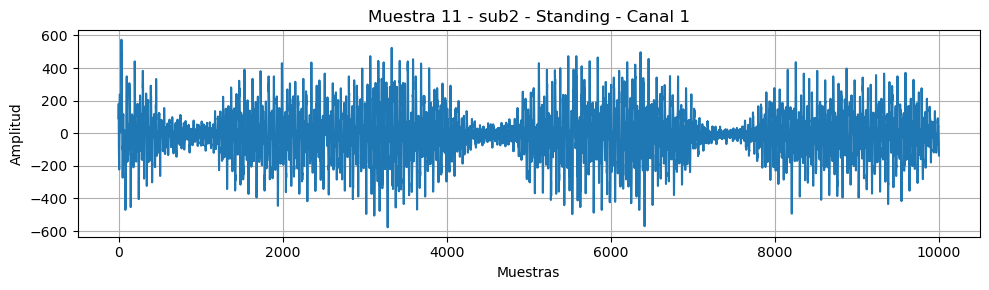

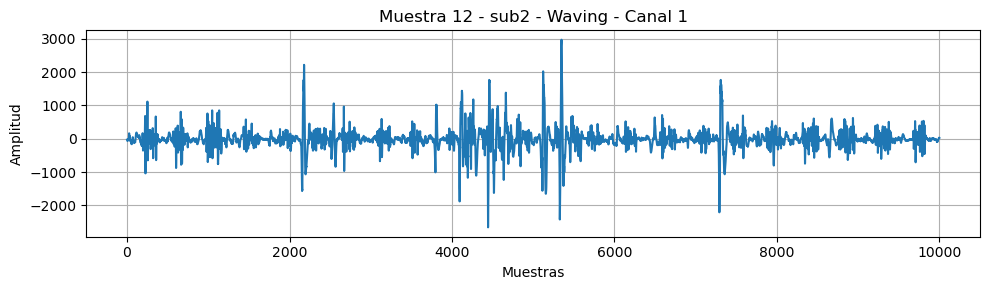

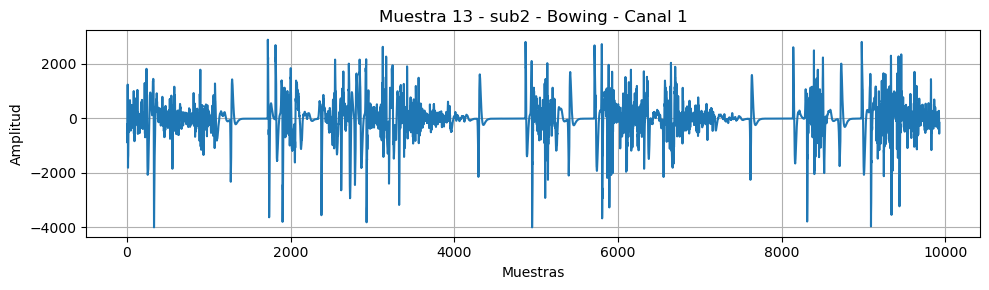

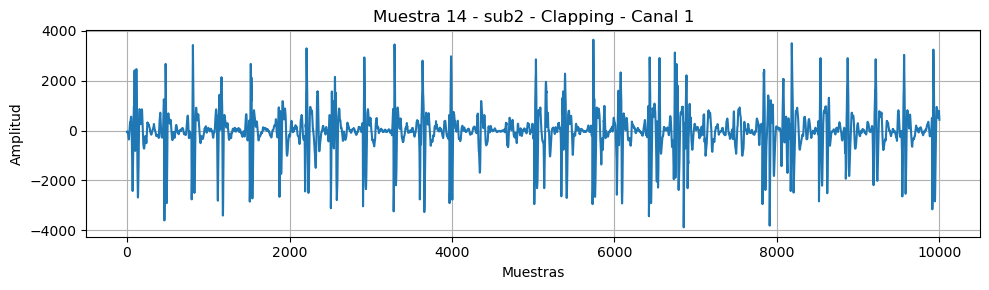

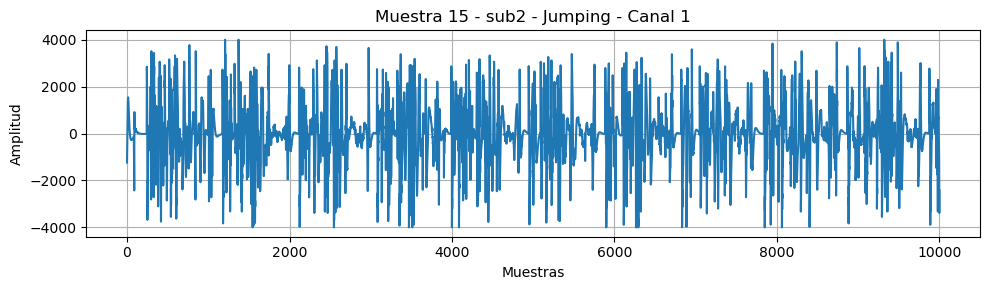

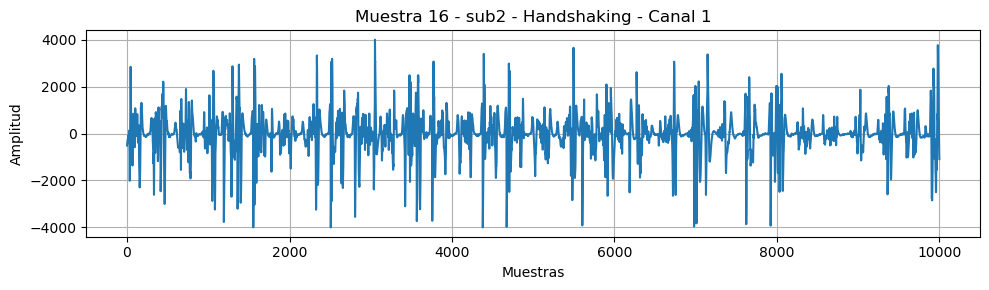

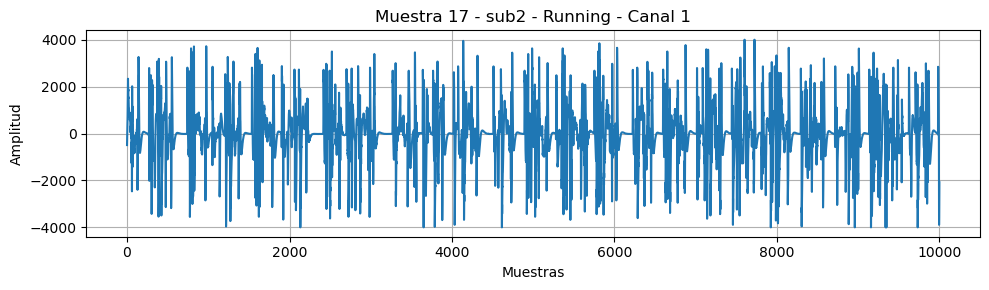

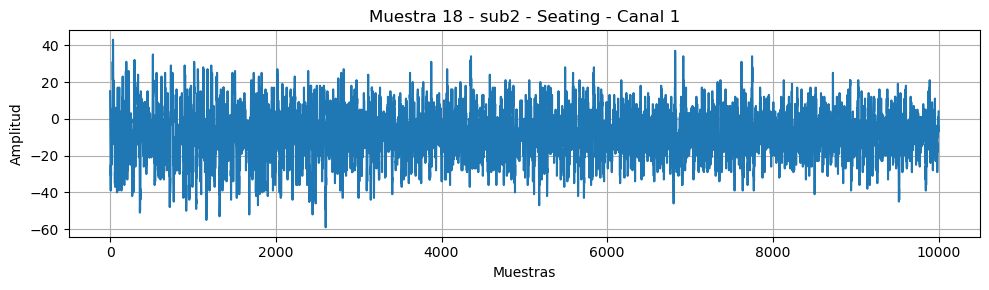

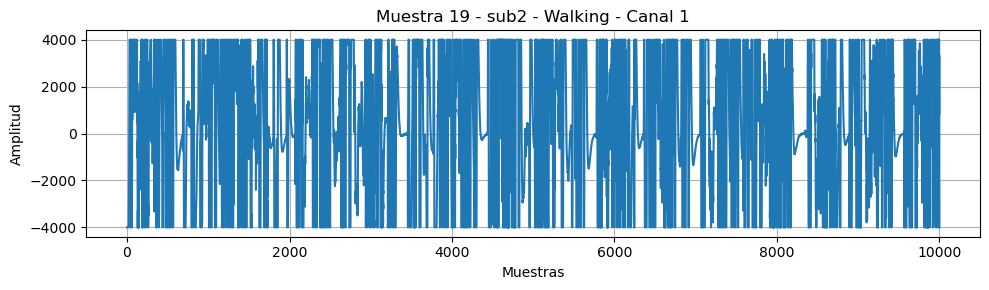

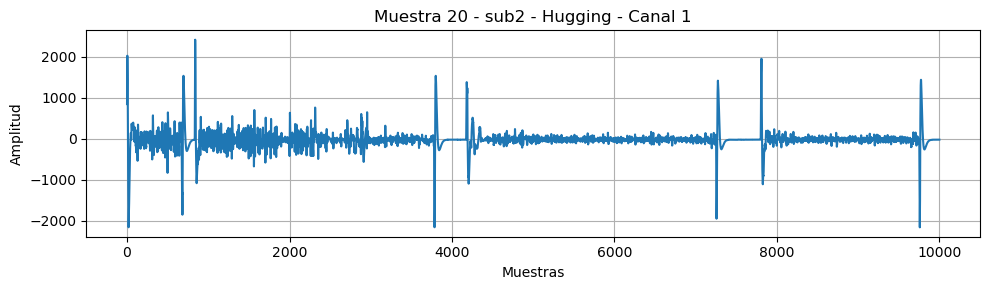

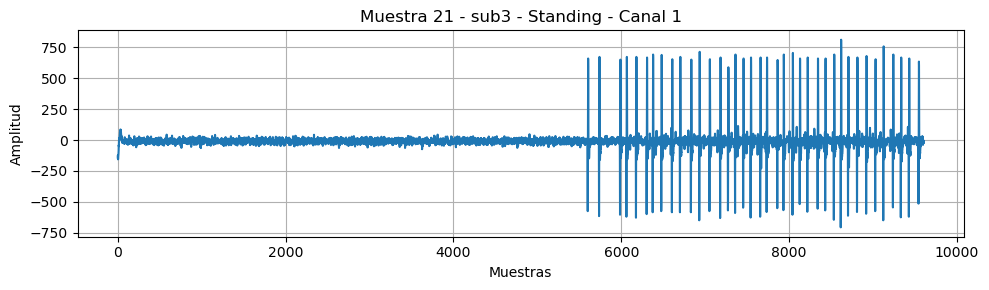

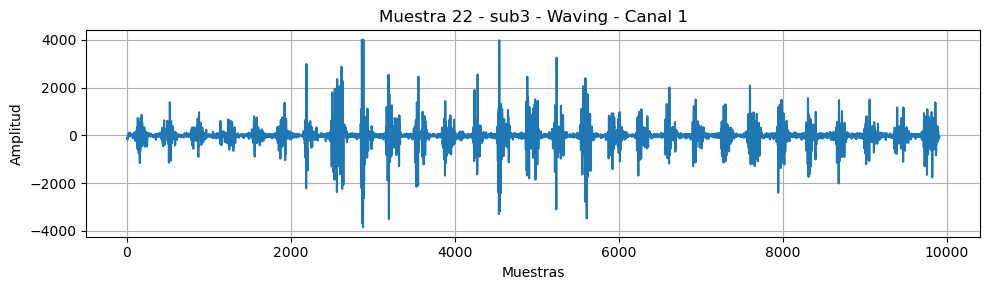

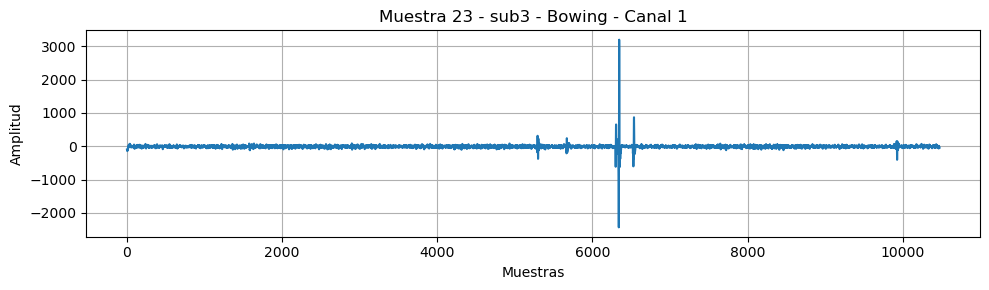

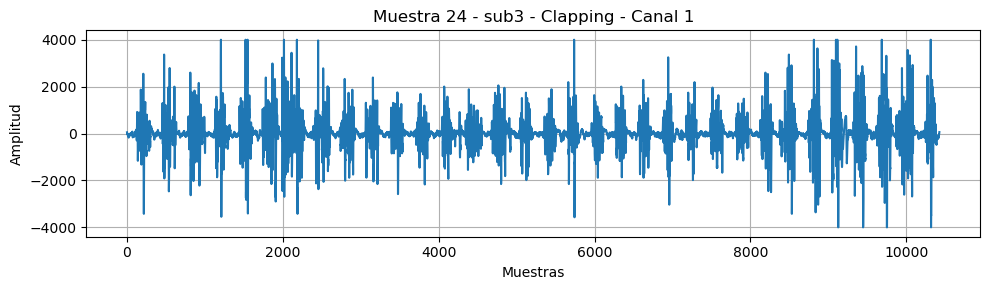

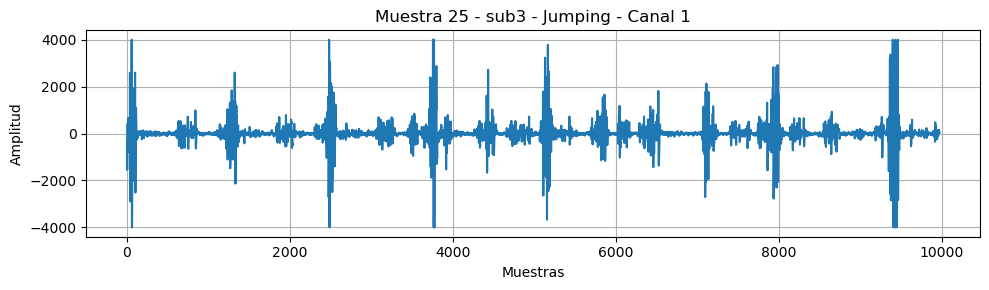

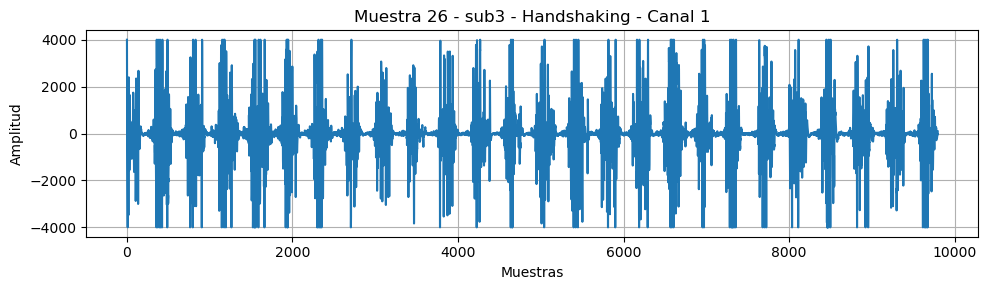

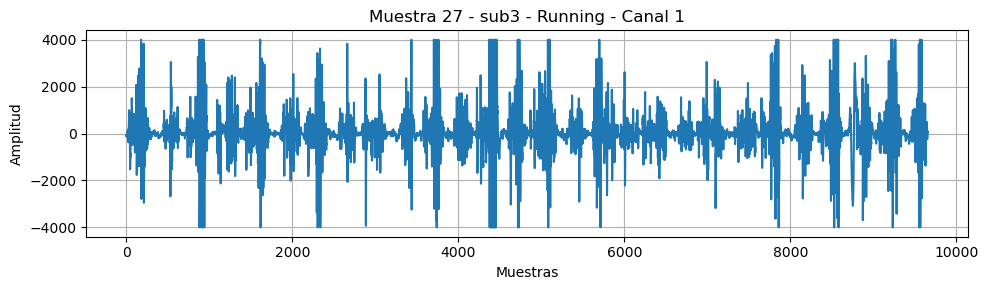

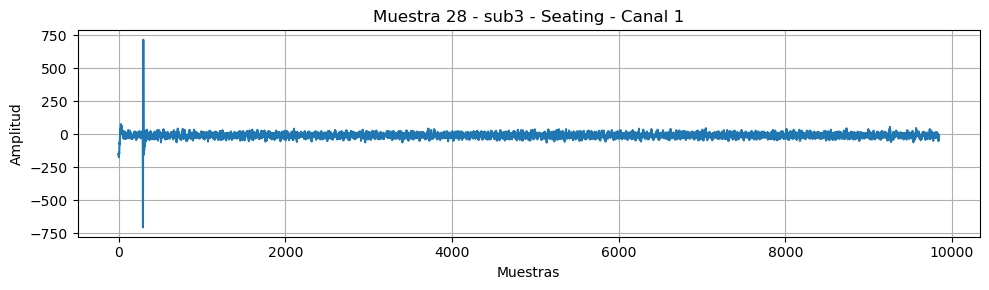

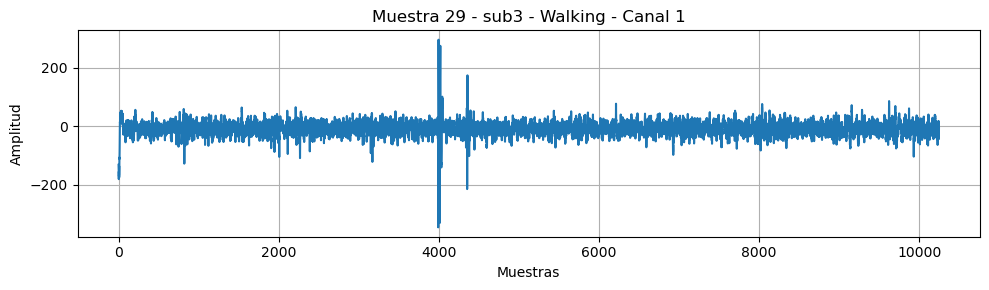

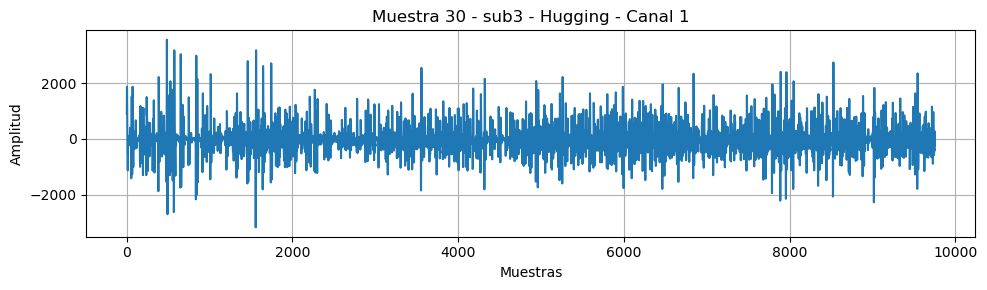

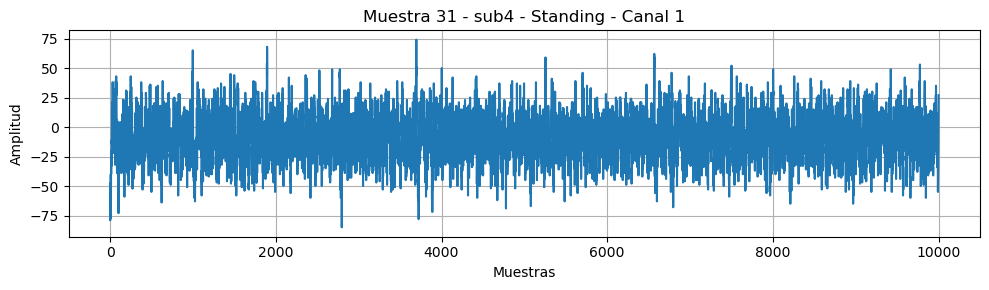

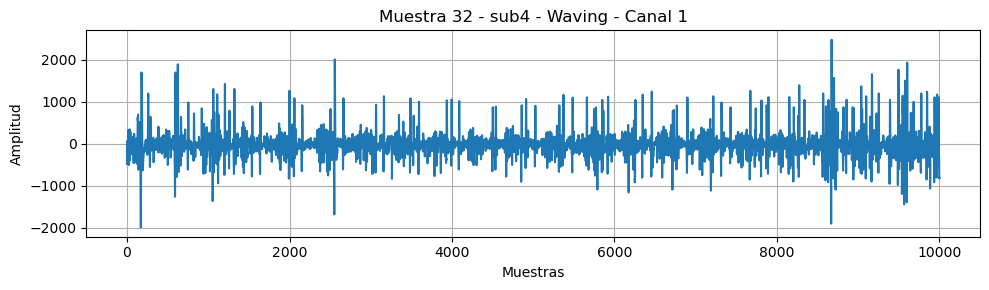

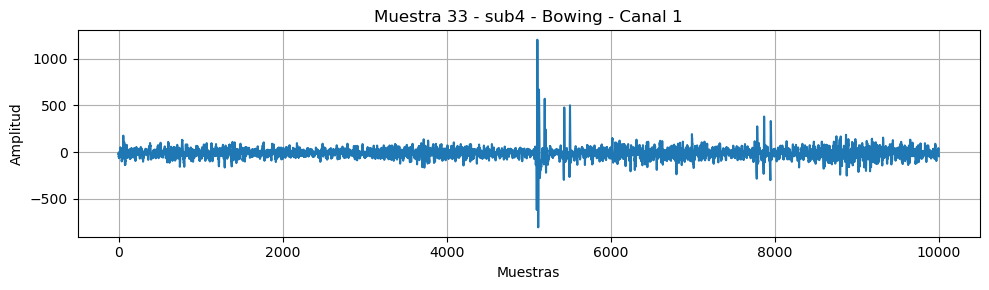

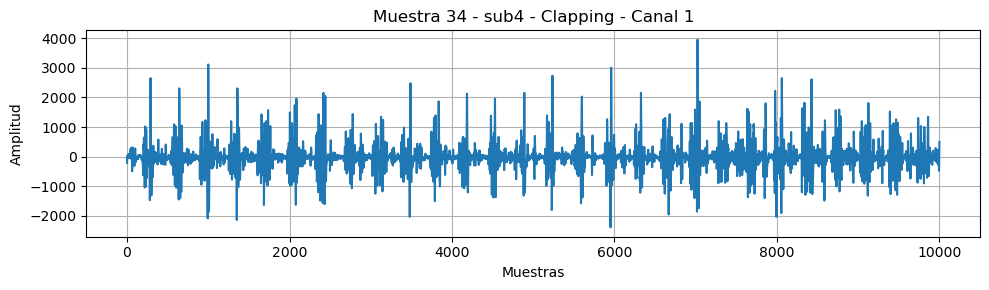

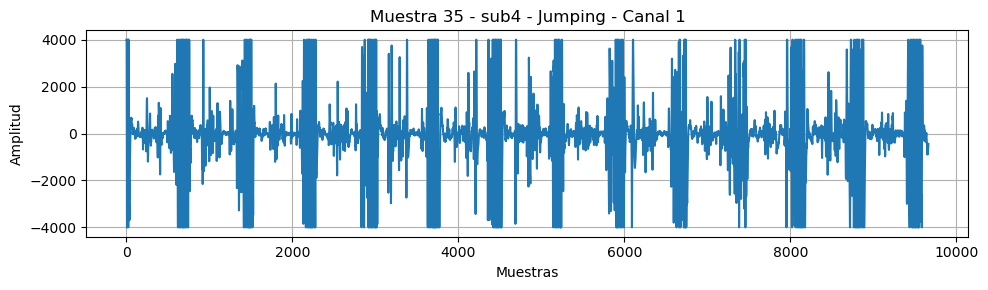

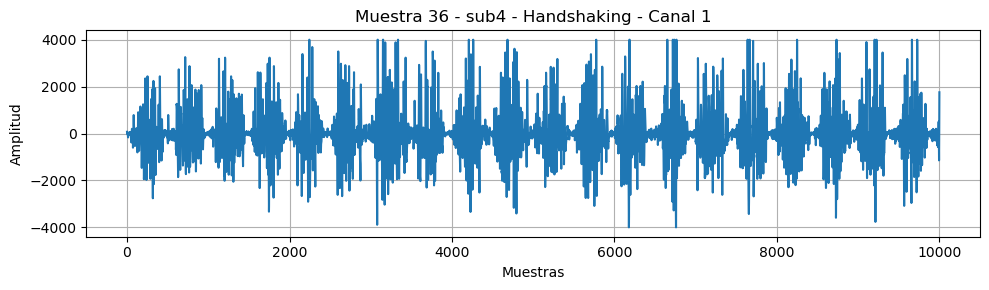

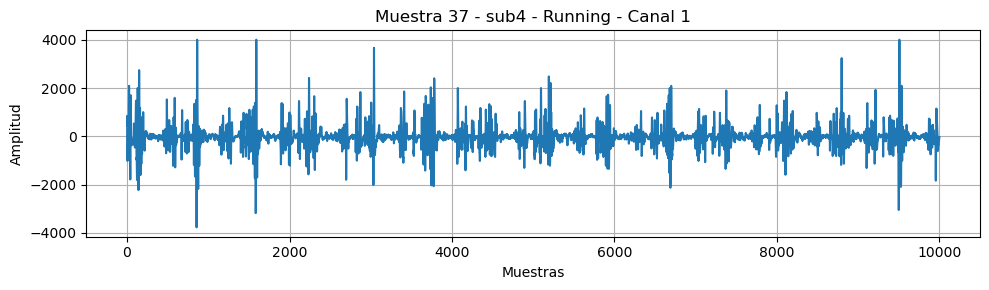

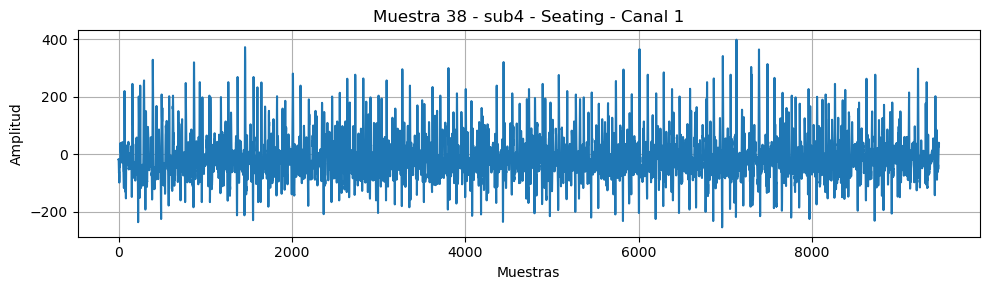

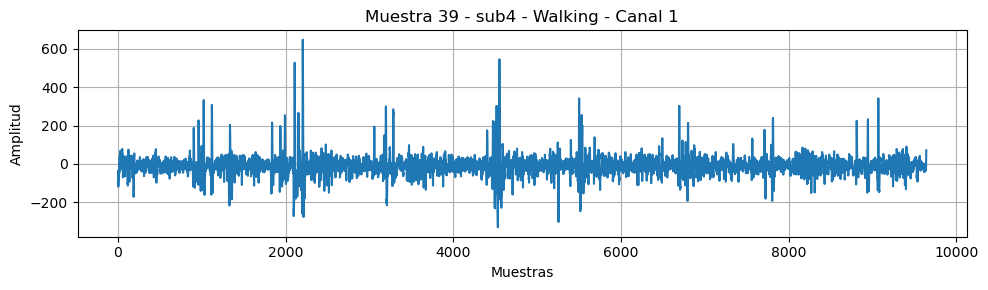

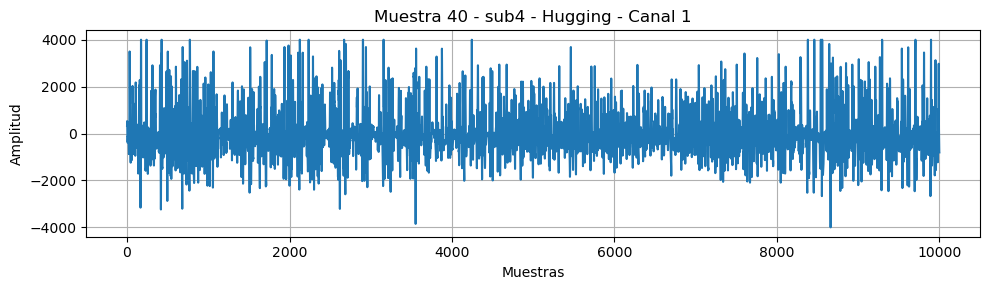

In [28]:
import numpy as np
import os
import matplotlib.pyplot as plt

# Ruta a los datos
ruta_datos = "EMG Physical Action Data Set"

def cargar_datos(ruta_base):
    X = []
    y = []
    etiquetas = os.listdir(os.path.join(ruta_base, "sub1", "Normal", "txt"))

    for sujeto in ["sub1", "sub2", "sub3", "sub4"]:
        ruta_txt = os.path.join(ruta_base, sujeto, "Normal", "txt")
        for nombre_archivo in etiquetas:
            ruta_archivo = os.path.join(ruta_txt, nombre_archivo)
            if not os.path.exists(ruta_archivo): continue
            datos = np.loadtxt(ruta_archivo)
            X.append(datos)
            actividad = nombre_archivo.replace(".txt", "")  # Quitamos el .txt
            y.append((sujeto, actividad))  # Guardamos sujeto + actividad
    
    return np.array(X, dtype=object), np.array(y)

# Cargar datos
X, Y = cargar_datos(ruta_datos)

# Graficar solo el primer canal de cada muestra con información del sujeto
for i, muestra in enumerate(X):
    if muestra.ndim == 1:
        canal = muestra  # Solo un canal
    else:
        canal = muestra[:, 0]  # Solo canal 1

    sujeto, actividad = Y[i]

    plt.figure(figsize=(10, 3))
    plt.plot(canal)
    plt.title(f"Muestra {i+1} - {sujeto} - {actividad} - Canal 1")
    plt.xlabel("Muestras")
    plt.ylabel("Amplitud")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

2. **Modelos AR, MA y ARMA**: Aplicar modelos autorregresivos (AR), de medias móviles (MA) y autorregresivos de medias móviles (ARMA) para extraer características relevantes de las señales EMG.

In [29]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from statsmodels.tsa.arima.model import ARIMA
import warnings
from tqdm import tqdm
import pandas as pd

# Silenciar warnings molestos de ARIMA
warnings.filterwarnings("ignore")

# Normalización por canal (como en los notebooks anteriores)
def normalizar_senal(senal):
    scaler = StandardScaler()
    return scaler.fit_transform(senal.reshape(-1, 1)).ravel()

# Extracción robusta de coeficientes ARMA
def extraer_caracteristicas_ARMA(signal, orden=(2, 0, 2)):
    try:
        modelo = ARIMA(signal, order=orden)
        resultado = modelo.fit()
        return resultado.params  # Coeficientes AR, MA y constantes
    except:
        return np.zeros(sum(orden) + 1)  # Fallback: vector de ceros

# Extraer características ARMA de todos los canales
X_caracteristicas = []

# Crear un X de características y un Y con etiquetas:
for muestra in tqdm(X):             # Modelos con barras de progreso
    caracteristicas_por_muestra = []

    if muestra.ndim == 1:
        # Solo un canal
        canal = normalizar_senal(muestra)
        caracteristicas = extraer_caracteristicas_ARMA(canal)
        caracteristicas_por_muestra.extend(caracteristicas)
    else:
        # Varios canales
        for canal_idx in range(muestra.shape[1]):
            canal = muestra[:, canal_idx]
            canal = normalizar_senal(canal)
            caracteristicas = extraer_caracteristicas_ARMA(canal)
            caracteristicas_por_muestra.extend(caracteristicas)

    X_caracteristicas.append(caracteristicas_por_muestra)

X_caracteristicas = np.array(X_caracteristicas)
print("Matriz de características:", X_caracteristicas.shape)

# Mostrar las primeras filas con pandas:
df_caracteristicas = pd.DataFrame(X_caracteristicas)
display(df_caracteristicas.head())

100%|██████████| 40/40 [24:19<00:00, 36.49s/it]

Matriz de características: (40, 48)


,0,1,2,3,4,5,6,7,8,9,...,38,39,40,41,42,43,44,45,46,47
0,-1.592436e-04,0.076960,0.456410,0.480880,-0.462963,0.714568,-0.000493,0.089358,0.467058,0.518772,...,0.562796,0.442092,-0.502046,0.485897,0.002065,1.410204,-0.461474,-0.726993,-0.272733,0.589816
1,-4.134117e-04,1.820961,-0.890051,-0.035711,-0.960530,0.062661,-0.000227,1.563596,-0.629345,-0.622634,...,0.614322,0.562491,-0.382328,0.248522,-0.003488,0.302506,0.642941,0.523182,-0.423204,0.137500
2,3.288623e-04,0.875750,0.008265,-0.059518,-0.938838,0.536198,0.001707,1.093943,-0.277173,-0.017353,...,-0.956659,-0.098758,-0.900436,0.023579,0.000257,1.588219,-0.678765,0.319902,-0.587418,0.077585
3,1.090903e-04,1.741813,-0.819245,-0.042552,-0.957309,0.094621,-0.000865,1.708193,-0.761371,-0.064374,...,-0.701126,0.591024,0.144718,0.011803,-0.000457,0.593084,0.239242,1.000237,0.023876,0.101792
4,-8.081657e-07,1.258071,-0.346918,-0.019708,-0.978365,0.332972,-0.000130,1.156069,-0.333137,-0.079847,...,-0.463296,0.188134,-0.057021,0.040235,-0.000981,1.671154,-0.707723,0.077968,-0.163000,0.024650


3. **Redes Neuronales**: Utilizar redes neuronales para entrenar un modelo de clasificación basado en las características extraídas. Se centrará en la predicción de la actividad correspondiente al EMG.

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

# Extraer solo la etiqueta de actividad (ignorar el sujeto)
Y_labels = np.array([actividad for (sujeto, actividad) in Y])

# Separar conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(
    X_caracteristicas, Y_labels, test_size=0.3, stratify=Y_labels, random_state=42
)

# Crear el clasificador MLP (Multilayer Perceptron Classifier) -> 40 capas de 20 neuronas
clf = MLPClassifier(hidden_layer_sizes=(40, 20), max_iter=1000, random_state=42)

4. **Entrenamiento del Modelo**: Entrenar el modelo de clasificación utilizando las características extraídas y las redes neuronales.

In [31]:
# Entrenar la NN -> clasificador MLP (Multilayer Perceptron Classifier):
clf.fit(X_train, Y_train)

# Predicción de los tipos de actividad detectadas:
Y_pred = clf.predict(X_test)

5. **Evaluación del Modelo**: Evaluar el rendimiento del modelo utilizando métricas adecuadas y ajustar los parámetros según sea necesario.

Accuracy del modelo: 25.00%

Informe de clasificación:
              precision    recall  f1-score   support

      Bowing       0.00      0.00      0.00         1
    Clapping       0.00      0.00      0.00         1
 Handshaking       1.00      1.00      1.00         1
     Hugging       1.00      0.50      0.67         2
     Jumping       0.00      0.00      0.00         1
     Running       0.00      0.00      0.00         1
     Seating       0.00      0.00      0.00         2
    Standing       0.33      1.00      0.50         1
     Walking       0.00      0.00      0.00         1
      Waving       0.00      0.00      0.00         1

    accuracy                           0.25        12
   macro avg       0.23      0.25      0.22        12
weighted avg       0.28      0.25      0.24        12



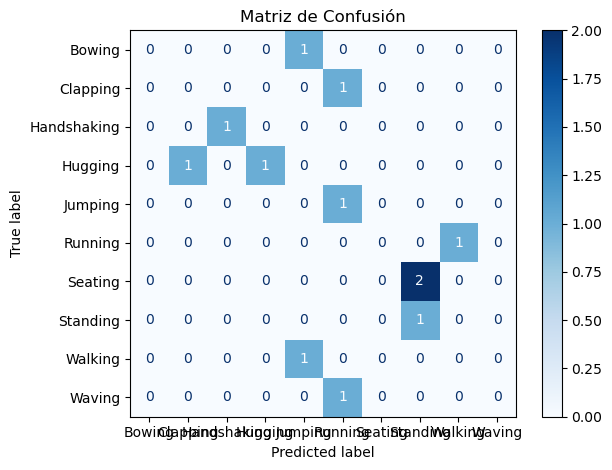

In [32]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Accuracy global
accuracy = accuracy_score(Y_test, Y_pred)
print(f"Accuracy del modelo: {accuracy:.2%}")

# Informe detallado por clase
print("\nInforme de clasificación:")
print(classification_report(Y_test, Y_pred))

# Matriz de confusión
cm = confusion_matrix(Y_test, Y_pred, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)

# Visualización personalizada
disp.plot(cmap='Blues', values_format='d')
plt.title("Matriz de Confusión")
plt.grid(False)
plt.tight_layout()
plt.show()

6. **Informe Final**: Presentar un informe detallado que incluya la metodología, resultados obtenidos y conclusiones.

🎯 Objetivo General:

El objetivo de este proyecto ha sido desarrollar un sistema de clasificación de actividades físicas humanas a partir del análisis de señales electromiográficas (EMG) multicanal. Para ello, se ha empleado un pipeline completo que incluye el preprocesamiento de datos, la extracción de características mediante modelos ARMA y el uso de redes neuronales para la clasificación automática.

⸻

1. Carga y Organización de Datos:
	- Se utilizaron datos procedentes de 4 sujetos (sub1 a sub4) realizando 10 actividades físicas normales (como “Walking”, “Running”, “Standing”, etc.).
	- Cada archivo .txt contiene registros multicanal (8 canales EMG) por actividad y sujeto.
	- Se etiquetaron las muestras con su correspondiente actividad.

⸻

2. Preprocesamiento de Señales:
	- Cada canal de cada muestra fue normalizado individualmente mediante StandardScaler para evitar que escalas diferentes afectaran a la extracción de características.
	- Se silenció el ruido de warnings y errores de convergencia durante el modelado, garantizando una extracción robusta incluso con datos imperfectos.

⸻

3. Extracción de Características (Modelos ARMA):
	- A cada canal de señal EMG se le aplicó un modelo ARMA de orden (2, 0, 2), obteniendo así 5 coeficientes por canal (2 AR, 2 MA y 1 constante).
	- Dado que cada muestra contiene 8 canales, se generó un vector de características de 40 dimensiones por muestra.
	- Estas características capturan la dinámica temporal de la señal EMG, siendo utilizadas como entrada al modelo de clasificación.

⸻

4. Clasificación Mediante Red Neuronal (MLPClassifier):
	- Se utilizó un clasificador de tipo MLP (Multilayer Perceptron) con dos capas ocultas de 40 y 20 neuronas respectivamente.
	- El conjunto de datos se dividió en entrenamiento (70 %) y test (30 %), asegurando la representatividad de clases mediante stratify.
	- Se entrenó el modelo durante 1000 iteraciones como máximo, utilizando los vectores de características ARMA como entrada y las actividades como etiquetas de salida.

⸻

5. Evaluación del Modelo:
	- Se calculó la accuracy global, obteniendo un rendimiento de aproximadamente 25 %.
	- Se generó un informe de clasificación (classification_report) mostrando precision, recall y F1-score por clase.
	- Se visualizó una matriz de confusión para estudiar los errores de clasificación entre actividades.

⸻

6. Análisis de Resultados y Problemas Detectados:

- Resultados:
	- El modelo acierta en un 25 % de los casos, lo cual es un resultado bastante malo, debido a el pequeño tamaño del dataset con el que se entrena el modelo o también al propio modelo, la red neuronal de un solo perceptrón con la cual no conseguimos una gran precisión a la hora de predecir.
	- Se observa que algunas clases con más ejemplos (como “Running” o “Handshaking”) tienden a clasificarse mejor, mientras que el resto se confunden con frecuencia.

- Problemas detectados:
	- Dataset pequeño: 40 muestras totales → muy poco para un clasificador multiclase basado en una NN.
	- Desequilibrio de clases: algunas actividades tienen solo 1 o 2 ejemplos → imposible aprender patrones consistentes.
	- Representación ARMA sensible: si la señal tiene poca dinámica diferenciable, los coeficientes se parecen entre clases.
	- Red neuronal poco estable en datasets pequeños, especialmente sin regularización ni early stopping.

⸻

7. Posibles Mejoras:

- Para mejorar el rendimiento del sistema, hay varias opciones que se pueden barajar:
	1.	Ampliar el dataset: utilizar más muestras por actividad, o usar ventanas deslizantes (sliding windows) para aumentar el número de ejemplos por cada muestra.
	2.	Eliminar o reagrupar clases poco representadas, o agrupar actividades similares.
	3.	Probar otros clasificadores más robustos para pocos datos; como RandomForest, SVM o LogisticRegression.
	4.	Explorar otras técnicas de extracción de características: estadísticas del tiempo, transformadas de Fourier, wavelets, etc.
	5.	Aplicar regularización o validación cruzada para redes neuronales.

⸻

📌 Conclusión Final

Este proyecto ha permitido poner en práctica el flujo completo de un sistema de análisis y clasificación de señales EMG reales, desde la carga y limpieza de datos hasta la evaluación final de la red neuronal creada para la predicción de las distintas actividades. A pesar de las limitaciones del conjunto de datos y de la baja precisión del modelo obtenida, se ha construido un modelo algo funcional y extensible.
